<a href="https://colab.research.google.com/github/itimes-digital/deep-learning-estudo/blob/main/classificacao_multiclasse/classificacao-multiclasse_iris_validacao_cruzada.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np

In [2]:
base = pd.read_csv('https://raw.githubusercontent.com/itimes-digital/deep-learning-estudo/main/dataset/iris.csv', sep=',')
base.head()

,sepal length,sepal width,petal length,petal width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


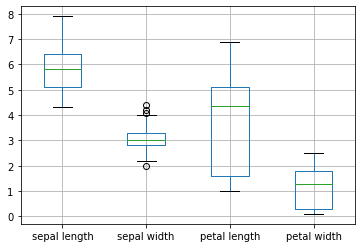

In [3]:
base[['sepal length',	'sepal width',	'petal length',	'petal width']].boxplot()

In [4]:
previsores = base.iloc[:, 0:4].values
classe = base.iloc[:, 4].values

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.utils import np_utils
from keras.models import Sequential # camadas sequencialmente
from keras.layers import Dense # camadas profundas fullconnect ou densa
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score

**Deve transformar dados categórico para numérico.**

In [6]:
# 3 tipos em uma coluna
labelEncoder = LabelEncoder()
classe = labelEncoder.fit_transform(classe)

In [7]:
# Transformação categórica em 3 colunas, pois a camada de saída tem três neurônios
# iris - setosa     1 0 0
# iris - virginica  0 1 0
# iris - versicolor 0 0 1
classe_dummy = np_utils.to_categorical(classe)

In [8]:
# (quantidade de entrada + quantidade de saída) / 2
units = np.round((4 + 3) / 2)
units

4.0

In [9]:
def criarRede():
  classificator = Sequential();
  classificator.add(Dense(units = 4, 
                        activation = 'relu',
                        input_dim = 4));

  classificator.add(Dense(units = 4, 
                        activation = 'relu'));

  # Função softmax retorna probabilidade para cada classe
  classificator.add(Dense(units=3, activation = 'softmax'));

  classificator.compile(optimizer = 'adam', 
                      loss = 'categorical_crossentropy',
                      metrics = ['categorical_accuracy']);
  return classificator;

In [10]:
classificator = KerasClassifier(build_fn = criarRede,
                                epochs = 1000,
                                batch_size = 10)

In [11]:
resultado = cross_val_score(estimator = classificator,
                            X = previsores, 
                            y = classe,
                            cv = 10,
                            scoring = 'accuracy');

Streaming output truncated to the last 5000 lines.
Epoch 503/1000
14/14 [==============================] - 0s 1ms/step - loss: 1.0858 - categorical_accuracy: 0.3704
Epoch 504/1000
14/14 [==============================] - 0s 1ms/step - loss: 1.0858 - categorical_accuracy: 0.3556
Epoch 505/1000
14/14 [==============================] - 0s 2ms/step - loss: 1.0858 - categorical_accuracy: 0.3481
Epoch 506/1000
14/14 [==============================] - 0s 1ms/step - loss: 1.0858 - categorical_accuracy: 0.3704
Epoch 507/1000
14/14 [==============================] - 0s 1ms/step - loss: 1.0859 - categorical_accuracy: 0.3704
Epoch 508/1000
14/14 [==============================] - 0s 1ms/step - loss: 1.0858 - categorical_accuracy: 0.3704
Epoch 509/1000
14/14 [==============================] - 0s 1ms/step - loss: 1.0859 - categorical_accuracy: 0.3333
Epoch 510/1000
14/14 [==============================] - 0s 1ms/step - loss: 1.0858 - categorical_accuracy: 0.3704
Epoch 511/1000
14/14 [===============

In [12]:
media = resultado.mean()
media

0.8400000000000001

In [13]:
desvio = resultado.std()
desvio

0.29992591677871977